# Unindo as bases de dados - Oscar e IMDB

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [10]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

## Importando Dataframes

In [11]:
with open('imdb.pkl', 'rb') as f:
    df_imdb=pickle.load(f)

In [12]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447057 entries, 0 to 1161023
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      447057 non-null  object 
 1   primaryTitle   447057 non-null  object 
 2   originalTitle  447057 non-null  object 
 3   startYear      447057 non-null  int64  
 4   genres         435537 non-null  object 
 5   averageRating  447057 non-null  float64
 6   numVotes       447057 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [13]:
with open('oscar.pkl', 'rb') as f:
    df_oscars=pickle.load(f)

In [14]:
df_oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
 7   nominee        10395 non-null  bool  
dtypes: bool(2), int64(3), object(3)
memory usage: 507.7+ KB


## Tratando Strings nas colunas da Junção

In [15]:
df_imdb.primaryTitle=df_imdb.primaryTitle.str.lower()

In [16]:
df_imdb.primaryTitle=df_imdb.primaryTitle.str.replace('&', 'and')

In [17]:
df_oscars.film=df_oscars.film.str.lower()

In [18]:
df_oscars.film=df_oscars.film.str.replace('&', 'and')

### Filtrando filmes indicados e vencedores do Oscar

In [19]:
drop_cols=['year_ceremony', 'ceremony', 'category', 'name', 'winner']
df_nominee=df_oscars.drop(columns=drop_cols)

In [20]:
df_nominee = df_nominee.drop_duplicates(subset=['film','nominee'])
df_nominee.nominee.value_counts()

True    4833
Name: nominee, dtype: int64

In [21]:
df_nominee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 0 to 10386
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_film  4833 non-null   int64 
 1   film       4832 non-null   object
 2   nominee    4833 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 118.0+ KB


In [22]:
drop_cols=['year_ceremony', 'ceremony', 'category', 'name', 'nominee']
df_winner=df_oscars.drop(columns=drop_cols)

In [23]:
df_winner = df_winner.drop_duplicates(subset=['film','winner'])
df_winner=df_winner[df_winner.winner.isin([True])]
df_winner.winner.value_counts()

True    1274
Name: winner, dtype: int64

## Unindo os Dataframes

In [24]:
df_imdb_oscar_nominee = df_imdb.merge(df_nominee, left_on=['primaryTitle','startYear'], right_on=['film','year_film'], how='left')

In [25]:
df_imdb_oscar_nominee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447057 entries, 0 to 447056
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      447057 non-null  object 
 1   primaryTitle   447057 non-null  object 
 2   originalTitle  447057 non-null  object 
 3   startYear      447057 non-null  int64  
 4   genres         435537 non-null  object 
 5   averageRating  447057 non-null  float64
 6   numVotes       447057 non-null  int64  
 7   year_film      3870 non-null    float64
 8   film           3870 non-null    object 
 9   nominee        3870 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 37.5+ MB


In [26]:
df_imdb_oscar = df_imdb_oscar_nominee.merge(df_winner, left_on=['primaryTitle','startYear'], right_on=['film','year_film'], how='left')

In [27]:
df_imdb_oscar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447057 entries, 0 to 447056
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      447057 non-null  object 
 1   primaryTitle   447057 non-null  object 
 2   originalTitle  447057 non-null  object 
 3   startYear      447057 non-null  int64  
 4   genres         435537 non-null  object 
 5   averageRating  447057 non-null  float64
 6   numVotes       447057 non-null  int64  
 7   year_film_x    3870 non-null    float64
 8   film_x         3870 non-null    object 
 9   nominee        3870 non-null    object 
 10  year_film_y    1092 non-null    float64
 11  film_y         1092 non-null    object 
 12  winner         1092 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 47.8+ MB


In [28]:
df_imdb_oscar.nominee.value_counts(dropna=False)

NaN     443187
True      3870
Name: nominee, dtype: int64

In [29]:
df_imdb_oscar.winner.value_counts(dropna=False)

NaN     445965
True      1092
Name: winner, dtype: int64

### Percentual de União Nominee

In [1]:
3870/4833*100

80.07448789571696

### Percentual de União Winner

In [3]:
1092/1274*100

85.71428571428571

### Filtrando Colunas Desnecessárias

In [82]:
drop_cols=['year_film_x','year_film_y','film_x','film_y' ]
df_imdb_oscar=df_imdb_oscar.drop(columns=drop_cols)

In [83]:
df_imdb_oscar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447057 entries, 0 to 447056
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      447057 non-null  object 
 1   primaryTitle   447057 non-null  object 
 2   originalTitle  447057 non-null  object 
 3   startYear      447057 non-null  int64  
 4   genres         435537 non-null  object 
 5   averageRating  447057 non-null  float64
 6   numVotes       447057 non-null  int64  
 7   nominee        3870 non-null    object 
 8   winner         1092 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 34.1+ MB


## Tratando Valores Faltantes

In [84]:
df_imdb_oscar=df_imdb_oscar.loc[df_imdb_oscar['startYear'] < 2021]

In [85]:
df_imdb_oscar.loc[(df_imdb_oscar['winner'].isnull()),'winner']=False

In [86]:
df_imdb_oscar.loc[(df_imdb_oscar['nominee'].isnull()),'nominee']=False

In [91]:
df_imdb_oscar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444329 entries, 0 to 447056
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      444329 non-null  object 
 1   primaryTitle   444329 non-null  object 
 2   originalTitle  444329 non-null  object 
 3   startYear      444329 non-null  int64  
 4   genres         432835 non-null  object 
 5   averageRating  444329 non-null  float64
 6   numVotes       444329 non-null  int64  
 7   nominee        444329 non-null  object 
 8   winner         444329 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 33.9+ MB


In [87]:
df_imdb_oscar.winner.value_counts(dropna=False)

False    443237
True       1092
Name: winner, dtype: int64

In [88]:
df_imdb_oscar.nominee.value_counts(dropna=False)

False    440459
True       3870
Name: nominee, dtype: int64

### Mapa de Calor

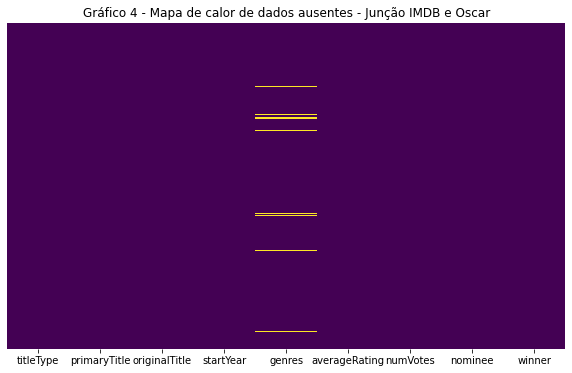

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_imdb_oscar.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title='Gráfico 4 - Mapa de calor de dados ausentes - Junção IMDB e Oscar');

In [90]:
 with open('oscar_imdb.pkl', mode = 'wb') as f:
  pickle.dump(df_imdb_oscar, f)